## Lab 6 (February 14):
### Tibbles and Data Importation

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 - [Tibbles]()
 - [Data Importation]()

 






<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [ ]:
install.packages("gapminder")                      ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)                                 ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)
      
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---

<br> <br>


**Introduction:**   

As data scientists, we need data for our analyses. Data could be created on the fly or imported from a file either locally or remotely. We will look at how to create data on the fly (using Tibbles) as well as importing them from files (Data Importation).   

<br>   
# 1. Tibbles
We can create our own data using `tibble()` or `data.frame()`. These two produce similar but  slightly different objects whose difference would be explored later. Popular functions for tibbles include:
- `tibble()` - Use to contrct data by **columns**.
- `tribble()` - Use to contrct data by **rows**.
- `as_tibble()` - used to convert a dataset into a tibble.
- `is_tibble()` - a logical function to test whether a dataset is a tibble.





## **(1) Creating datasets**

## Example 1.1

In [ ]:
## (1) Using tibble()
tdf <- tibble(
  name   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  age    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  class  = c('dog', 'cat', 'cat', 'dog')
)


## (2) Using tribble() 
## enters data by row. 
tr_df <- tribble(
  ~name, ~age, ~weight, ~class,
  # -----|-----|------ |-----    just to signify that this is a the header (column names)                   
  "Nikita", 10, 24, "dog",
  "Simons", 7, 16, "cat",
  "Pockets", 5, 12, "cat",
  "Eres", 6, 18, "dog"
)


## (3) Using data.frame()
df <- data.frame(
  name   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  age    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  class  = c('dog', 'cat', 'cat', 'dog')
)

In [ ]:
tdf

name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


In [ ]:
## inspect the data
tdf
tr_df
df 


name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


## **(2) Differences between Tibble and Dataframe**
Tibbles are different than dataframes in that:

## Example 1.2

#### **(i) Tibbles <u>**print**</u> data with its column types (i.e interger, character etc)**

In [ ]:
## print the tibble data
tdf %>% print()

## print the dataframe
df %>% print()

# A tibble: 4 × 4
  name      age weight class
  <chr>   <dbl>  <dbl> <chr>
1 Nikita     10     24 dog  
2 Simons      7     16 cat  
3 Pockets     5     12 cat  
4 Eres        6     18 dog  
     name age weight class
1  Nikita  10     24   dog
2  Simons   7     16   cat
3 Pockets   5     12   cat
4    Eres   6     18   dog



**(ii) Tibbles <u>**print**</u> only the first 10 rows and all columns that fit the screen. This default feature can be overriden with `options(tibble.print_max = n, tibble.print_min = m)`** 

In [ ]:
## tibble
tibble(x = 1:1000, y = sample(x = c("True", "False"), size = 1000, replace = TRUE)) %>% print()

# A tibble: 1,000 × 2
       x y    
   <int> <chr>
 1     1 False
 2     2 False
 3     3 False
 4     4 False
 5     5 True 
 6     6 False
 7     7 False
 8     8 False
 9     9 True 
10    10 False
# … with 990 more rows


In [ ]:
## Overiding the defaults
options(tibble.print_min = 20)

In [ ]:
## dataframe
data.frame(x = 1:1000, y = sample(x = c("True", "False"), size = 1000, replace = TRUE)) %>% print()

        x     y
1       1 False
2       2 False
3       3 False
4       4  True
5       5 False
6       6  True
7       7 False
8       8  True
9       9 False
10     10  True
11     11  True
12     12 False
13     13  True
14     14 False
15     15  True
16     16  True
17     17 False
18     18 False
19     19  True
20     20  True
21     21  True
22     22 False
23     23 False
24     24 False
25     25 False
26     26  True
27     27  True
28     28  True
29     29  True
30     30  True
31     31 False
32     32 False
33     33  True
34     34  True
35     35 False
36     36 False
37     37  True
38     38  True
39     39 False
40     40 False
41     41 False
42     42  True
43     43 False
44     44 False
45     45  True
46     46 False
47     47  True
48     48 False
49     49  True
50     50  True
51     51 False
52     52 False
53     53 False
54     54  True
55     55 False
56     56 False
57     57  True
58     58 False
59     59  True
60     60 False
61     61 False
62     6


**(iii) In <u>**subsetting**</u>, `[` always returns another tibble while dataframes sometimes return a data frame or vector**

In [ ]:
## (1) Subsetting just a column using [
tdf[, 2] # the tibble outputs another tibble
df[, 2]  # dataframe returns a vector

age
<dbl>
10
7
5
6


[1] 10  7  5  6

In [ ]:
## (2) Subsetting just a column using [[ or $

# this gives us vector in both cases
tdf[[2]]
df[[2]]

tdf$age
df$age

[1] 10  7  5  6

[1] 10  7  5  6

[1] 10  7  5  6

[1] 10  7  5  6

**(iv) In <u>**subsetting**</u>, dataframes allow for partial matching; tibbles do not!**

In [ ]:
tdf$age ## tibble


[1] 10  7  5  6

In [ ]:
df$w  ## dataframe

[1] 24 16 12 18

**(v) They permit the use of invalid R variable names for column naming while dataframes do not!**

In [ ]:
tibble(
  `😁`   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  `_`    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  `@`  = c('dog', 'cat', 'cat', 'dog')
)

😁,_,weight,@
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


In [ ]:
data.frame(
  `:`   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  `_`    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  `@`  = c('dog', 'cat', 'cat', 'dog')
)

X.,X_,weight,X..1
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


**(vi) Tibbles allow for creating multiple columns, some of which may depend on those being created at the same time; dataframes do not allow this!**

In [ ]:
## tibble
(tbl_df <- tibble(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
))

x,y,z
<int>,<dbl>,<dbl>
1,5,26
2,5,33
3,5,52
4,5,89
5,5,150


In [ ]:
## dataframe
(df <- data.frame(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
))

ERROR: ignored

**(vii) Tibbles do not support arithmetic operations on columns. They silently get converted to dataframes**

In [ ]:
tbl_df <- tibble(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
)

as_tibble(tbl_df^2)
#tbl_df^2 ## that the output becomes dataframe

x,y,z
<dbl>,<dbl>,<dbl>
1,25,676
4,25,1089
9,25,2704
16,25,7921
25,25,22500


<br><br>
## 2. Data Importation
As discussed earlier, data typically comes in 5 types namely:
<br><br>

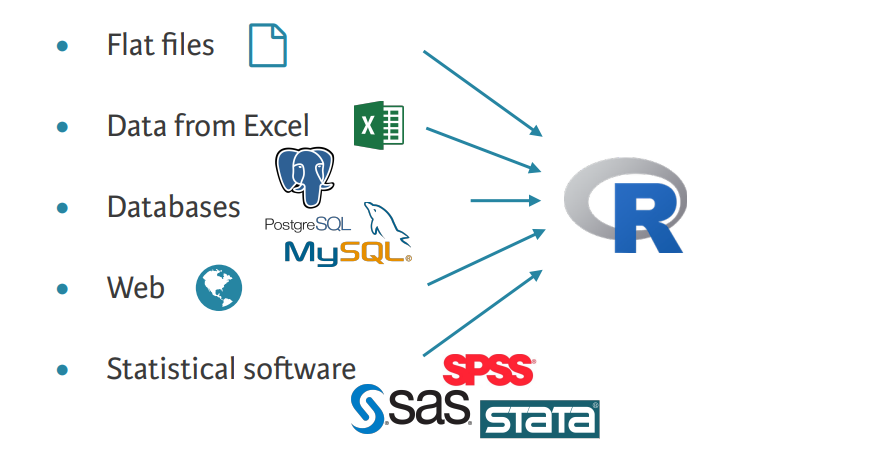

_[Source: Datacamp]_

Our job is to learn how to read and write data in some of these file formats as needed. Most of these file formats require special packages. Below are a few:

- **readr** - comma seperated values, tab seperated values and other delimiters (.csv, .txt)
- **readxl** - excel files (.xls and .xlsx)
- **haven** - SPSS, Stata, and SAS files
- **DBI** - databases
- **jsonlite** - JSON ((JavaScript Object Notation) 
- **xml2** - XML
- **httr** - Web APIs
- **rvest** - HTML (Web Scraping)

For the purpose of this lab, we will explore reading and writing delimiters (`readr`) and excel files (`readxl`) as they are arguably the most popular file formats for data.

<br>   
## 2.1 Flat Files
## **(1) Reading Delimiters**
We use the functions:
- `read_csv` - for comma separated values
- `read_tsv` - for tab separated values
- `read_delim` - for general delimiters (could be comma, semi-colon, tab, pipe or any delimiter).

General structure arguments for these functions include:   
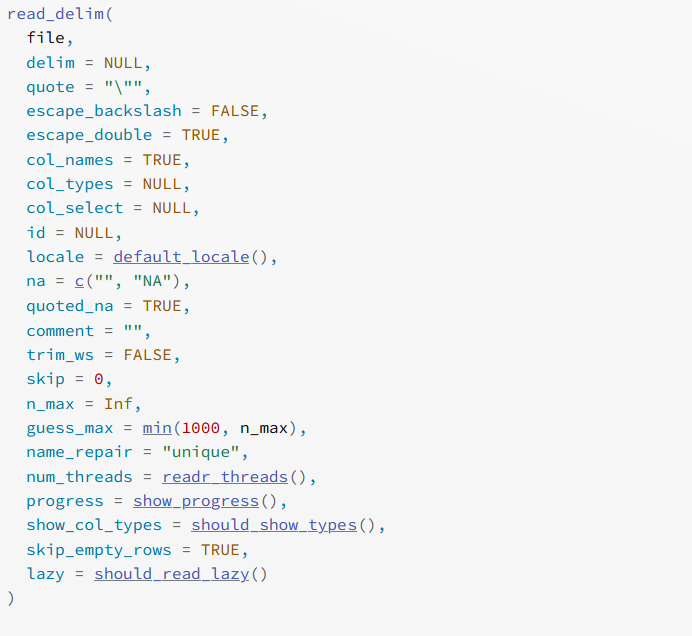

We will explore a few examples below

#### **(i) Reading csvs and txts**

In [ ]:
## (1) Reading CSV
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.csv"
chicks_df = read_csv(file = file_path) 
head(chicks_df)

New names:
* `` -> ...1

Rows: 71 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): feed
dbl (2): ...1, weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,weight,feed
<dbl>,<dbl>,<chr>
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean
6,168,horsebean


In [ ]:
## (2) Reading Tab separated file
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path) 
head(chicks_df_tab)

Rows: 71 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): feed
dbl (1): weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


weight,feed
<dbl>,<chr>
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean
168,horsebean


**_Challenge:_** How would you read the `chicks2.txt` file found [here]("https://github.com/bosafoagyare/web-academic/tree/master/content/courses/stats306-W22/Lab-Notes/lab6_data")?

In [ ]:
## (3) Reading pipe separated file
## your code here
data <- read_delim(file = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks2.txt")
data

Rows: 71 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
chr (1): feed
dbl (1): weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


weight,feed
<dbl>,<chr>
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean
168,horsebean
108,horsebean
124,horsebean
143,horsebean


#### **(ii) Column names**






In [ ]:
## (4) Discarding column names in reading the data
## R automatically sets column names for the data
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path, col_names = FALSE) 
head(chicks_df_tab)

Rows: 72 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2
<chr>,<chr>
weight,feed
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean


In [ ]:
## (6) Adding or renaming column names
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path,
                         col_names = c("weight in lb", "feed type"), 
                         show_col_types = FALSE) ## hides warning message
head(chicks_df_tab)

weight in lb,feed type
<chr>,<chr>
weight,feed
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean


#### **(iii) Column tpes**
The column types include:    
- `c` = character

- `i` = integer

- `n` = number

- `d` = double

- `l` = logical

- `f` = factor

- `D` = date

- `T` = date time

- `t` = time

- `?` = guess

- `_ `or `-` = skip

In [ ]:
## (7) Change default column types to integer and factor respectively
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path, col_types = "if") ## i for inter, f for factor 
head(chicks_df_tab)

weight,feed
<int>,<fct>
179,horsebean
160,horsebean
136,horsebean
227,horsebean
217,horsebean
168,horsebean


#### **(iv) Skip rows and select row limits**

In [ ]:
## (8) skip first 3 rows and set maximum imported rows to 4
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path,
                         col_names = c("weight in lb", "feed type"), 
                         skip = 3,
                         n_max = 4,
                         show_col_types = FALSE) ## hides warning message
chicks_df_tab

weight in lb,feed type
<dbl>,<chr>
136,horsebean
227,horsebean
217,horsebean
168,horsebean


<br>   
## **(2) Writing Delimiters**
Much like reading delimited files, we can equally write to files (create files) in R using functions such as:

- `write_csv` - for comma separated values
- `write_tsv` - for tab separated values
- `write_delim` - for general delimiters (could be comma, semi-colon, tab, pipe or any delimiter).

**NB:** When writing to file on the file, we use `write_file`

The general structure includes:

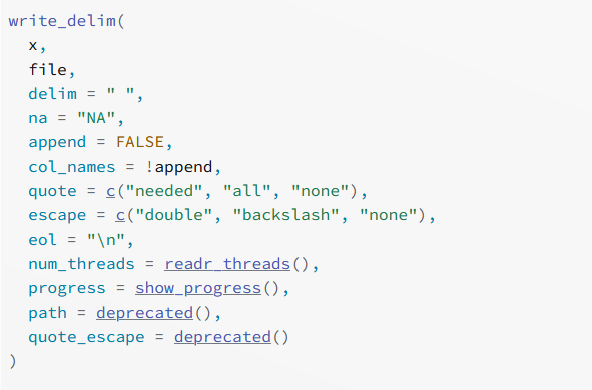

We will explore a few examples below:

#### **(i) Writing to delimiters on the fly**
**NB:** When writing to file on the file, we use `write_file`

In [ ]:
## (1) Writing to comma delimited
write_file(x = "a,b,c\n1,2,3\n4,5,NA", path = "file.csv") # we use \n to signify new line (next line)

## now let's take a look
read_csv(file = "file.csv")

Warning message:
“The `path` argument of `write_file()` is deprecated as of readr 1.4.0.
Please use the `file` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,NA


In [ ]:
## (2) Writing to tab delimited
write_file(x = "a\tb\tc\n1\t2\t3\n4\t5\tNA", path = "file.tsv")

## now let's take a look
read_tsv(file = "file.tsv")


Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,NA


In [ ]:
## (3) Writing to pipe-delimited
write_file(x = "a|b|c\n1|2|3\n4|5|NA", path = "file.txt")

## now let's take a look
read_delim(file = "file.txt", delim = "|")

Rows: 2 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "|"
dbl (3): a, b, c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,NA


#### **(ii) Writing to delimiters from already exixting data**
Recall our pets data. We are going to save this to csv, tab and pipe-delimited

In [ ]:
## Reacll the pets data
tdf

name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


In [ ]:
## (1) Write to csv
write_csv(tdf, file = "pet1.csv")

In [ ]:
## (2) Write to tab delimited
write_tsv(tdf, file = "pet2.tsv")

In [ ]:
## (3) Write to pipe delimited
write_delim(tdf, file = "pet3.txt", delim = "|")

<br><br>
# 3. Challenge
Complete the following tasks:
## 3.1 Pets Data
- Import the `pets.txt` data from [here](https://github.com/bosafoagyare/web-academic/tree/master/content/courses/stats306-W22/Lab-Notes/lab6_data)
- How many rows for each class has no missing values for age?
- Create a tibble for the resulting data in task two and save this data to a "/" delimited file with name: `compete_pets_df`
- Make a bar chart with proportion for this new tibble.
- Which class has most pet counts?


In [ ]:
## your code here

## Import the data
path_to_file = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/pets.txt"
data = read_tsv(file = path_to_file, show_col_types = FALSE)



In [ ]:
## Create a tibble 
compete_pets_df <- data %>% 
       filter(!is.na(age)) %>%
       group_by(class) %>% 
       count()

## Export the tible to the file name `compete_pets_df.txt` using forward slash delimiter
write_delim(x = compete_pets_df, file = "compete_pets_df.txt", delim = "/")    

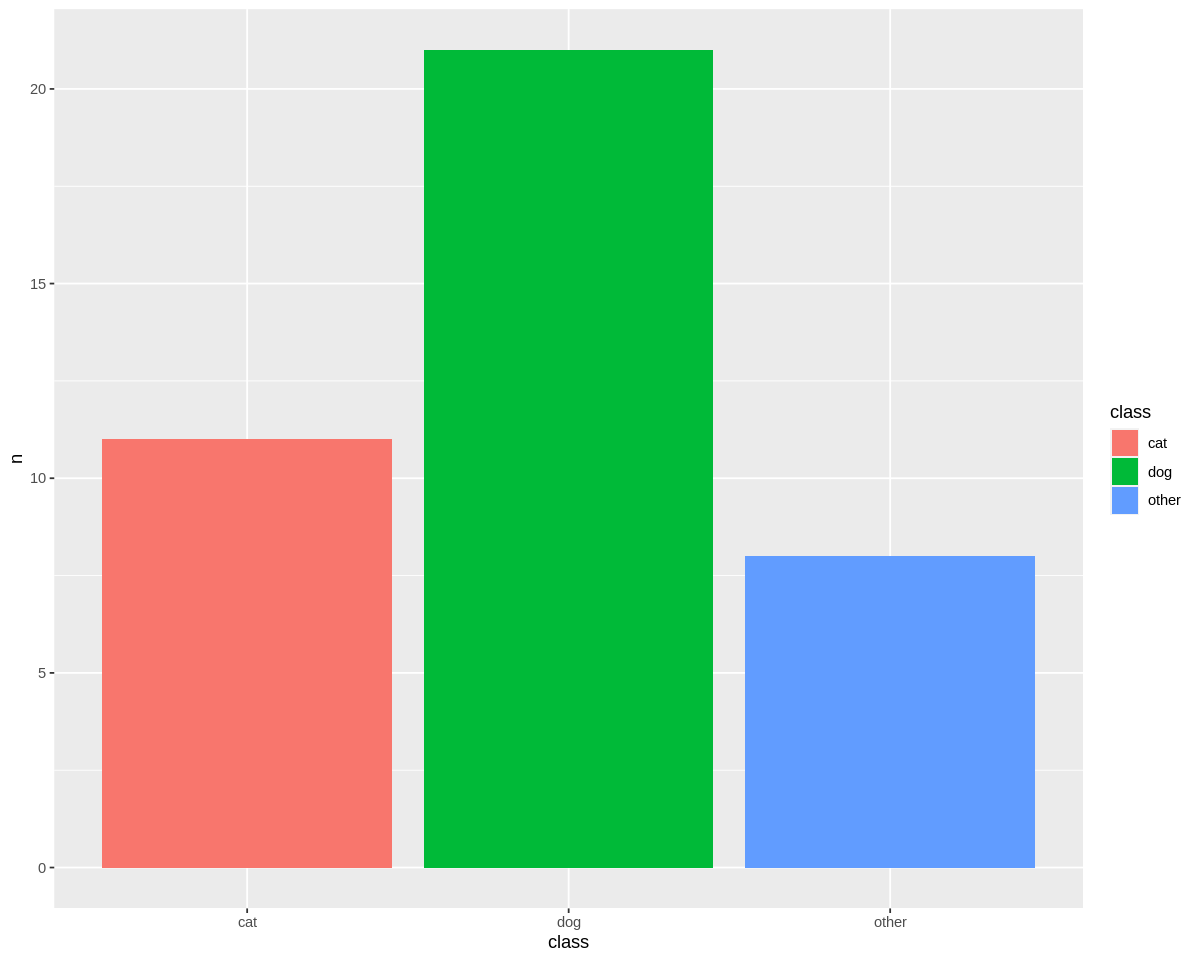

In [ ]:
compete_pets_df %>%
     ggplot() +
     geom_bar(aes(x = class, y = n, fill = class), stat="identity")

## 3.2 NHANES Data
In your job as a data scientist, you would most likely ever download data from a website. We have learned that data can be stored in several formats. One popular language for data analysis, especially in health is SAS. In this challenge, we are going to learn to read a wave of the NHANES (National Health and Nutrition Examination Survey) from the CDC (Centre for Disease and Control) [website](https://www.cdc.gov/).

<br>    
**(a)**    

- First, install and load the `haven` package. (This may already come with Tidyverse). 
- Import the `Demographics Data` dataset for the year 2015 [here](https://wwwn.cdc.gov/Nchs/Nhanes/continuousnhanes/default.aspx?BeginYear=2015) (DEMO_I.XPT) using the [`read_xpt()`](https://haven.tidyverse.org/reference/read_xpt.html) function (Note that this is a SAS data storage extension). Feel free to read about the documentation of the variables (column names) to get a good idea of what the dataset is about. _[hint: [source here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)]_
- Create a tibble containing only  `RIAGENDR` - Gender, `RIDAGEYR` - Age in years at screening and `DMDEDUC3` - Education level - Children/Youth 6-19. 
- Construct a histogram and a density plot using appropriate binwidth for the `RIDAGEYR` (Age in years at screening) variable.    

🤔 **Question:** What type of distribution best explains the data.


**(b)**
- Convert the `RIAGENDR` Gender variable to factor _[hint: `as.factor()`]_. Note that this is coded as 1=male and 2=female.
- We wish to compare the distribution of age for each gender. What appropriate visuallization tool should be used to explore this problem? Which gender appears to be older based on your plot?
- Finally, use an appropriate visualization tool to explore the distribution of the `DMDEDUC3` - Education level variable. Please refer to https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC3 to inspect the coding for this variable. Based on your plot, which grade level has the highest frequency?

#### **Solution (a)**

In [ ]:
## your code here

## Install and load haven
install.packages("haven")
library(haven)

## Import Data
file_path <- "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT"
Demo_df   <- read_xpt(file = file_path)

## Take a look at the entire data
head(Demo_df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,⋯,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
83732,9,2,1,62,NA,3,3,1,NA,⋯,5,1,3,134671.37,135629.51,1,125,10,10,4.39
83733,9,2,1,53,NA,3,3,1,NA,⋯,3,3,NA,24328.56,25282.43,1,125,4,4,1.32
83734,9,2,1,78,NA,3,3,2,NA,⋯,3,1,3,12400.01,12575.84,1,131,5,5,1.51
83735,9,2,2,56,NA,3,3,2,NA,⋯,5,6,NA,102718.00,102078.63,1,131,10,10,5.00
83736,9,2,2,42,NA,4,4,2,NA,⋯,4,3,NA,17627.67,18234.74,2,126,7,7,1.23
83737,9,2,2,72,NA,1,1,1,NA,⋯,5,1,5,11252.31,10878.68,1,128,14,14,2.82


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



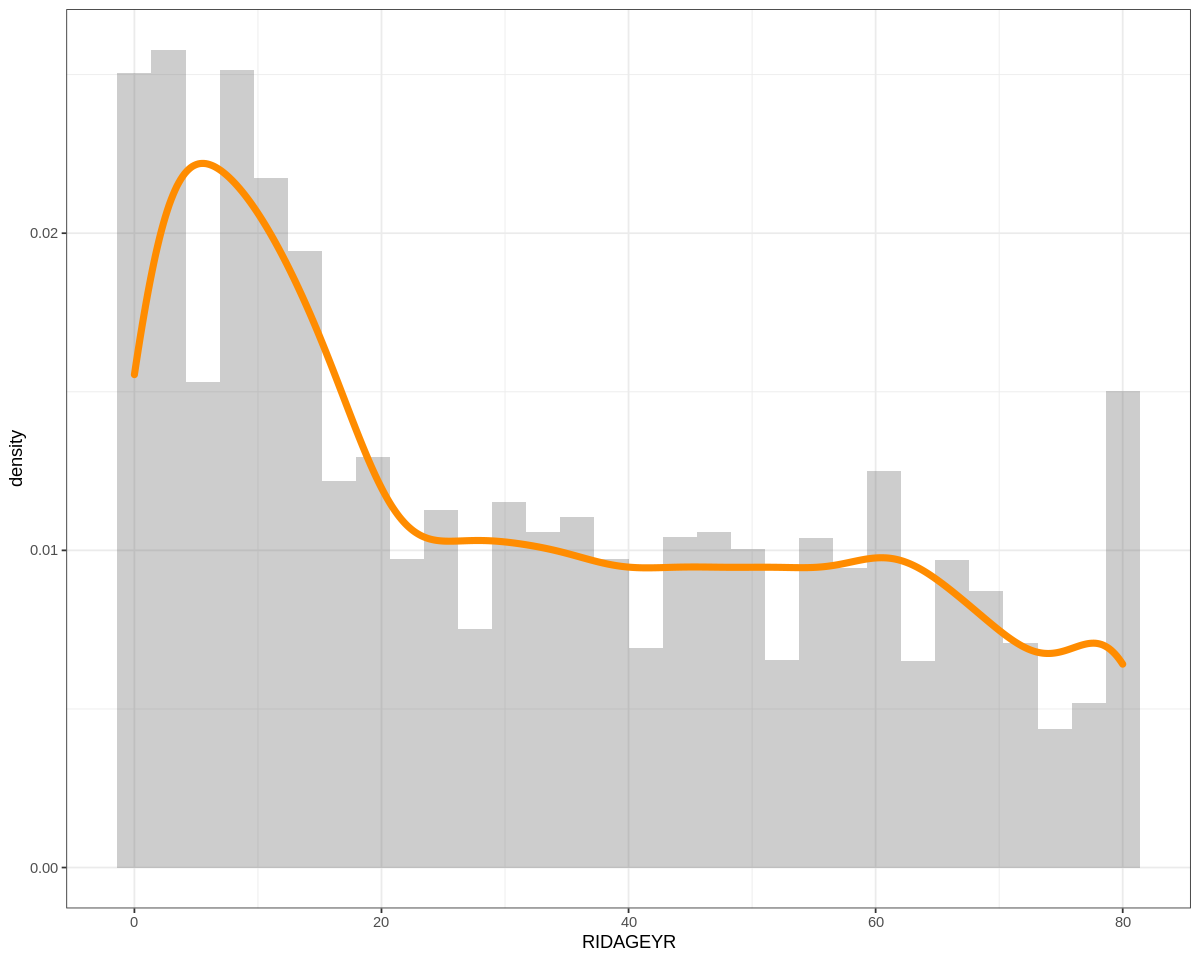

In [ ]:
## Create the tibble for Age, Gender and Education level
Basics <- Demo_df %>%
            select(RIAGENDR, RIDAGEYR, DMDEDUC3)

## Create a histogram and density plot
Basics %>%
   ggplot() +
   geom_histogram(aes(x = RIDAGEYR, y = stat(density)), alpha = 0.3) +
   geom_density(aes(x = RIDAGEYR), color = "darkorange", size = 2) +
   theme_bw()           

✅ **Answer:** The data fairly exhibit a right tail distribition, with a spike around age 80. Generally, lots of people are within the age 0 to 18.

#### **Solution (b)**

In [ ]:
## Convert RIAGENDR to factor

# OPTION 1
Basics <- Basics %>%
            mutate(RIAGENDR = factor(RIAGENDR)) ## This changes the data type from int to fct

# OPTION 2
## More appropriately, you may want to recode the values 
## Recall that 1 = male and 2 = female
## I will store this as a new variable Gender
Basics <- Basics %>%
            mutate(Gender = factor(RIAGENDR,
                                   levels = c(1,2), ## 1 for male, 2 for female
                                   labels = c("male", "female")
            ))


head(Basics)

RIAGENDR,RIDAGEYR,DMDEDUC3,Gender
<fct>,<dbl>,<dbl>,<fct>
1,62,NA,male
1,53,NA,male
1,78,NA,male
2,56,NA,female
2,42,NA,female
2,72,NA,female


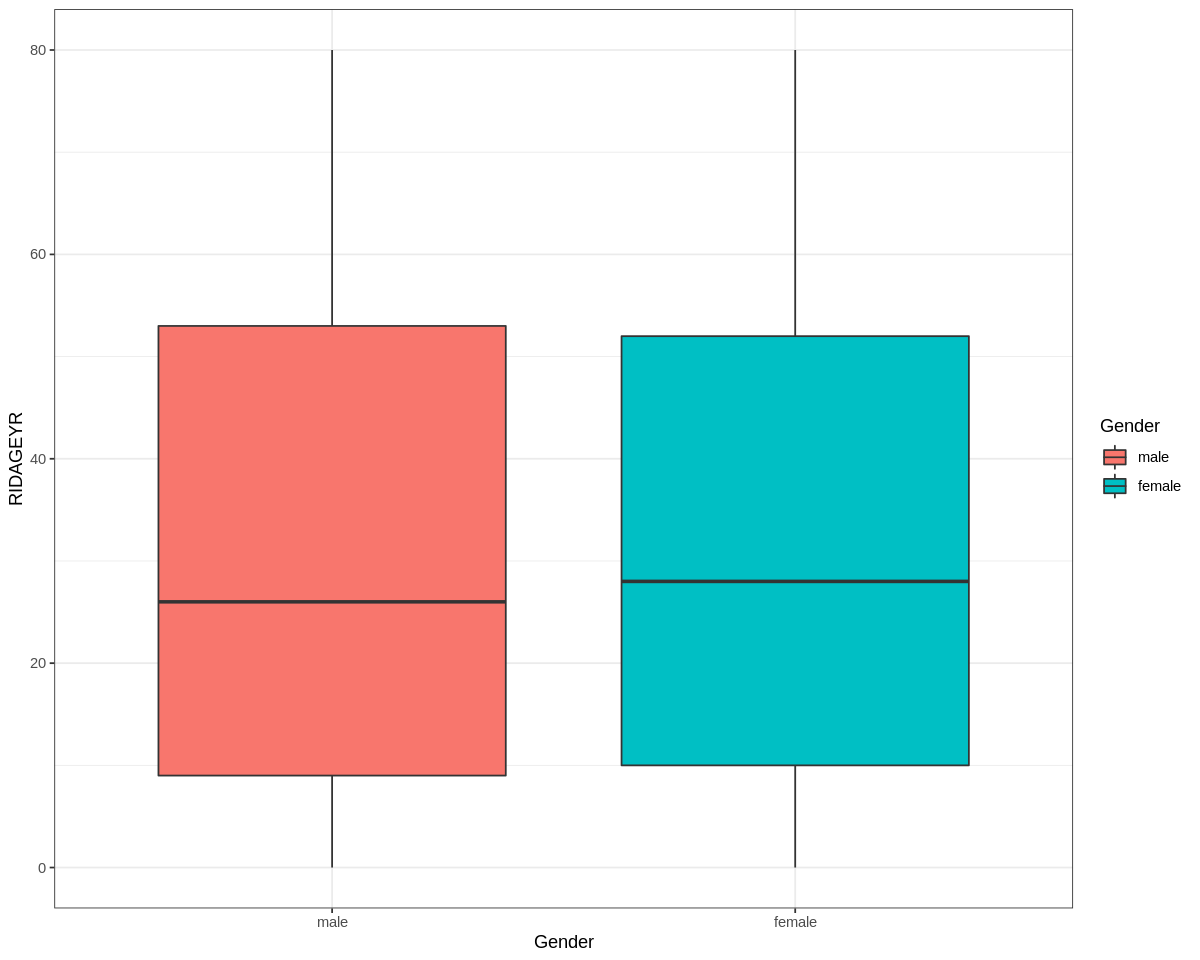

In [ ]:
## Compare the distribution of AGE for GENDER
Basics %>%
  ggplot(mapping = aes(x = Gender, y = RIDAGEYR, fill = Gender)) +
  geom_boxplot() + 
  theme_bw()

✅ **Answer:** The data seem exhibits equal distribution for both Genders.   
<br>

In [ ]:
## DMDEDUC3 - Education level - Children/Youth 6-19 is a categorical variable according to the documentation
## Thus, I'll convert it to a factor data type and optionally add the labels according to the coding from the docs

## Get all the unique coding for this variable
## This saves me some time than looking it up from the documentation
coding <- sort(unique(Basics$DMDEDUC3))
coding <- c(coding, NA) #add NA to the coding since it exists in the documentation

## Create a vector for the labels for the coding. See documentation
label <- c("Never attended / kindergarten only", 
           "1st grade", "2nd grade", "3rd grade",
           "4th grade", "5th grade", "6th grade",
           "7th grade", "8th grade", "9th grade",
           "10th grade", "11th grade", "12th grade, no diploma",
           "High school graduate", "GED or equivalent",
           "More than high school", "Less than 5th grade",
           "Less than 9th grade", "Don't Know")


Basics <- Basics %>%
            mutate(Education = factor(DMDEDUC3,
                                     levels = coding,
                                     labels = label
            ))


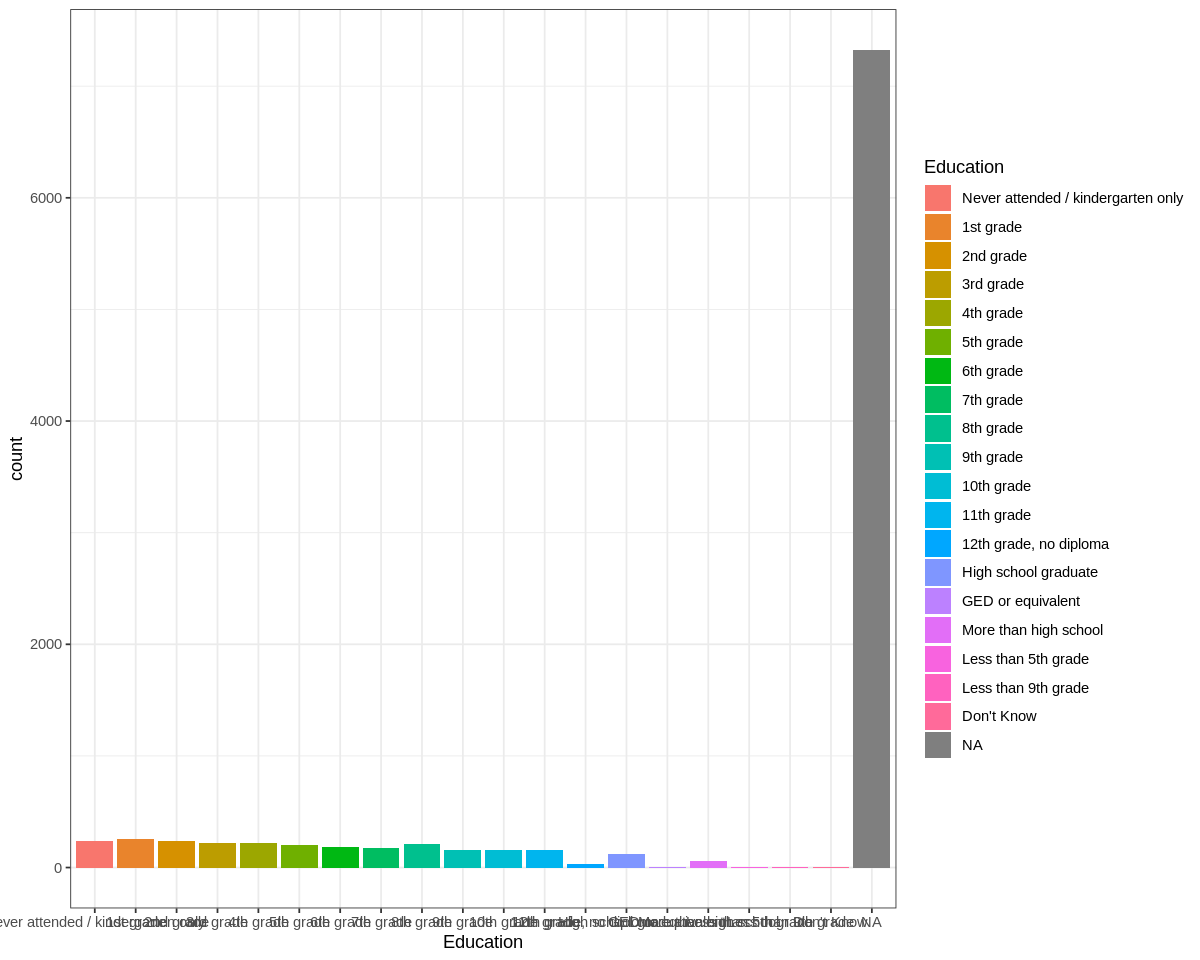

In [ ]:
## Make a bar chart to visualze the distribution
Basics %>% 
   ggplot(aes(x = Education, fill = Education)) +
   geom_bar() + 
   theme_bw()

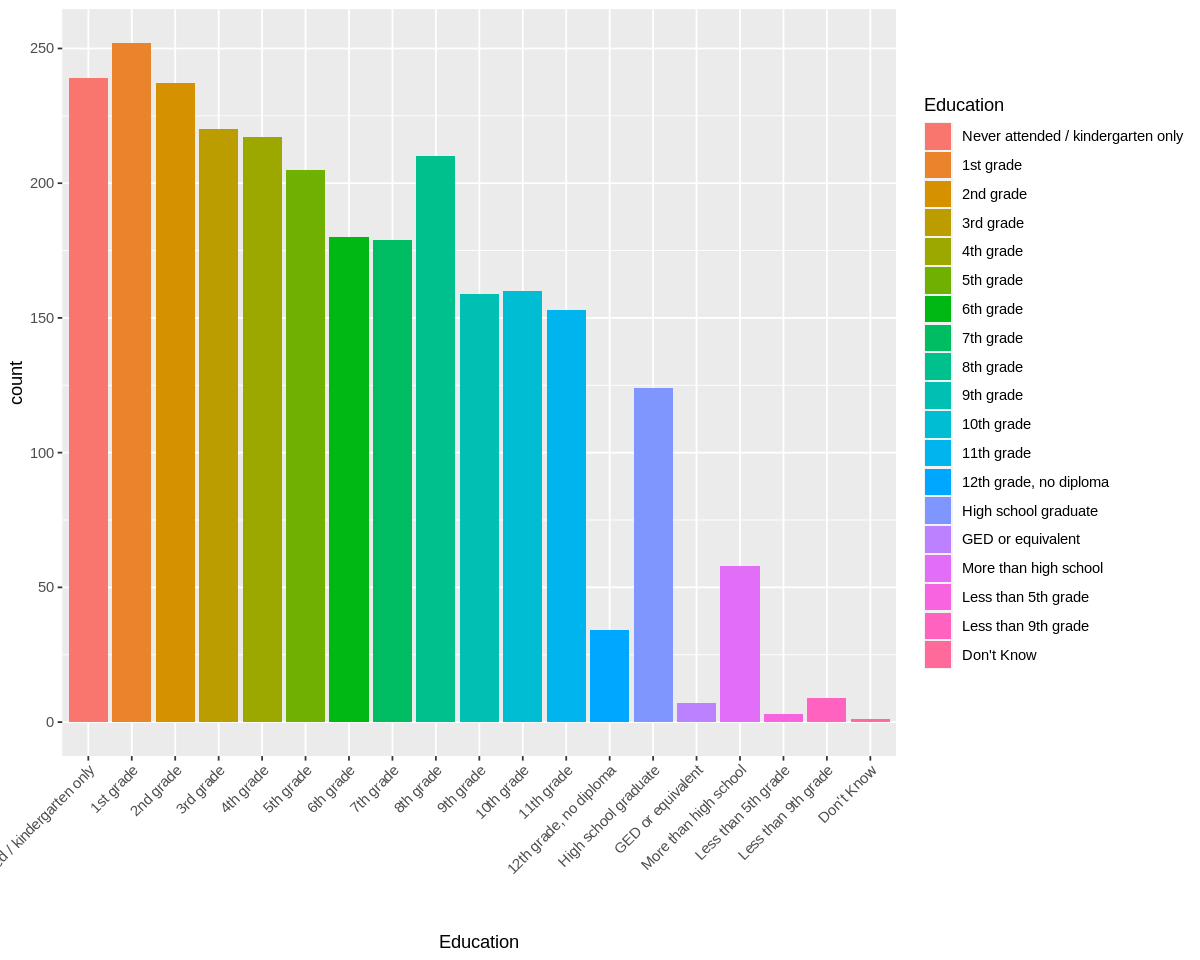

In [ ]:
## We notice two problems from the plot above:
## (1) The NA overwhelms the rest of the data. It might be a good idea to remove all NAs
## (2) The labels on the x-axis are overlapping. We should definitely fix this!
Basics %>%
   filter(!is.na(Education)) %>% ## remove the NAs
   ggplot(aes(x = Education, fill = Education)) +
   geom_bar() + 
   ## rotate the xlabels to angle of 45 degrees
   theme(axis.text.x = element_text(angle = 45, hjust=1)) 


✅ **Answer:** From the graph, the 1st grade has most counts.